In [1]:
# This is my (Silas) first attempt at handling the data for Germany

In [2]:
# To start out, I have gathered GDP per capita data from 1990-2022 and CEFR English proficiency data from 2011-2024

In [3]:
# Installing some packages that we will likely, but not necessarily, need

In [4]:
install.packages('ggplot2')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [5]:
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [53]:
install.packages('ggrepel')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [58]:
library(ggplot2)
library(dslabs)
library(ggrepel)
library(scales)

In [8]:
#NB: I will be using the international abbreviation 'de' for Germany

In [9]:
# Now let us name our data and inspect it. The data consists of csv files which we can read from this same folder in our repository. 
# Data source: ourworldindata.org https://ourworldindata.org/grapher/gdp-per-capita-worldbank?tab=chart&country=~DEU 

In [10]:
DEGDP <- read.csv("GDP_per_capita_germany_1990-2022_ourworldindata.csv")

In [11]:
head(DEGDP)

,Country,Year,GDPperCapita
,<chr>,<int>,<dbl>
1,Germany,1990,36699.48
2,Germany,1991,38294.16
3,Germany,1992,38734.94
4,Germany,1993,38105.23
5,Germany,1994,38881.57
6,Germany,1995,39366.09


In [12]:
str(DEGDP)

'data.frame':	33 obs. of  3 variables:
 $ Country     : chr  "Germany" "Germany" "Germany" "Germany" ...
 $ Year        : int  1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 ...
 $ GDPperCapita: num  36699 38294 38735 38105 38882 ...


In [13]:
# And the english proficiency in Germany measured with the CEFR system. 
# Data source: ef.com, https://www.ef.com/wwen/epi/regions/europe/germany/

In [14]:
DECEFR <- read.csv("germany_proficiency_2011-2024_CEFR_ef.csv", sep = ";")

In [15]:
head(DECEFR)

,Year,Proficiency_CEFR
,<int>,<int>
1,2011,551
2,2012,562
3,2013,561
4,2014,578
5,2015,587
6,2016,585


In [16]:
str(DECEFR)

'data.frame':	14 obs. of  2 variables:
 $ Year            : int  2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 ...
 $ Proficiency_CEFR: int  551 562 561 578 587 585 592 606 606 616 ...


In [17]:
# Now lets see what we can do with some plots, first, lets make a plot visualizing the rise in GDP per capita in the period 1990-2022

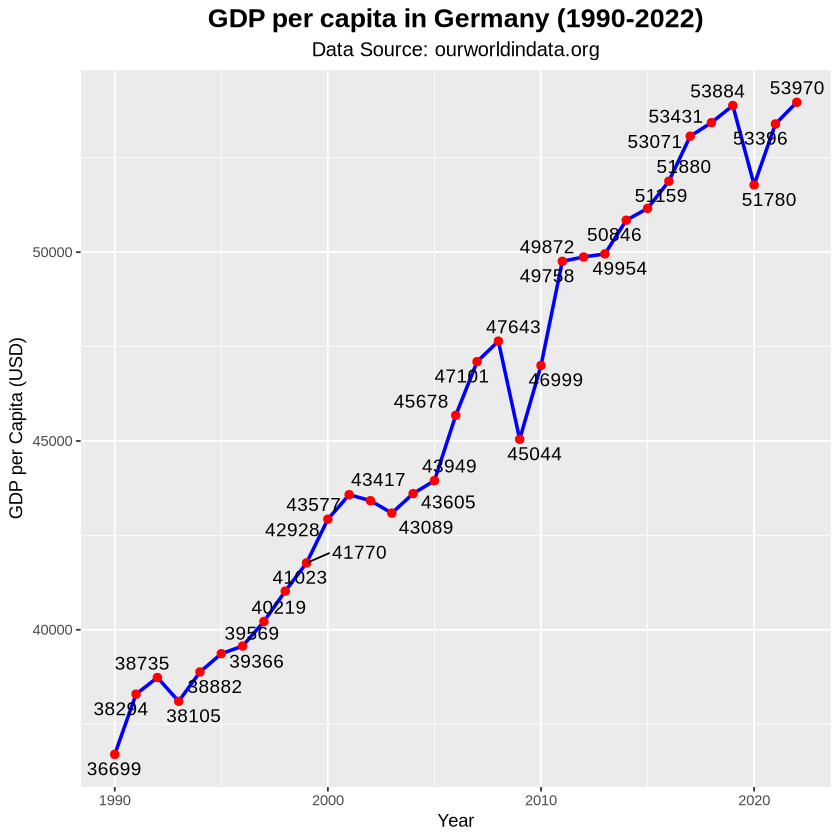

In [50]:
ggplot(DEGDP, aes(x = Year, y = GDPperCapita)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 2) +  # points per year
  geom_text_repel(aes(label = round(GDPperCapita, 0)),  # Labels
            size = 4, color = "black") +
  labs(
    title = "GDP per capita in Germany (1990-2022)",
    subtitle = "Data Source: ourworldindata.org",
    x = "Year",
    y = "GDP per Capita (USD)"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    plot.subtitle = element_text(hjust = 0.5, size = 12)
  )

In [ ]:
# We can also show it where the y axis starts at 0. This is better if we want to understand the gdp itself, but not so much if it is the changes we want to understand.

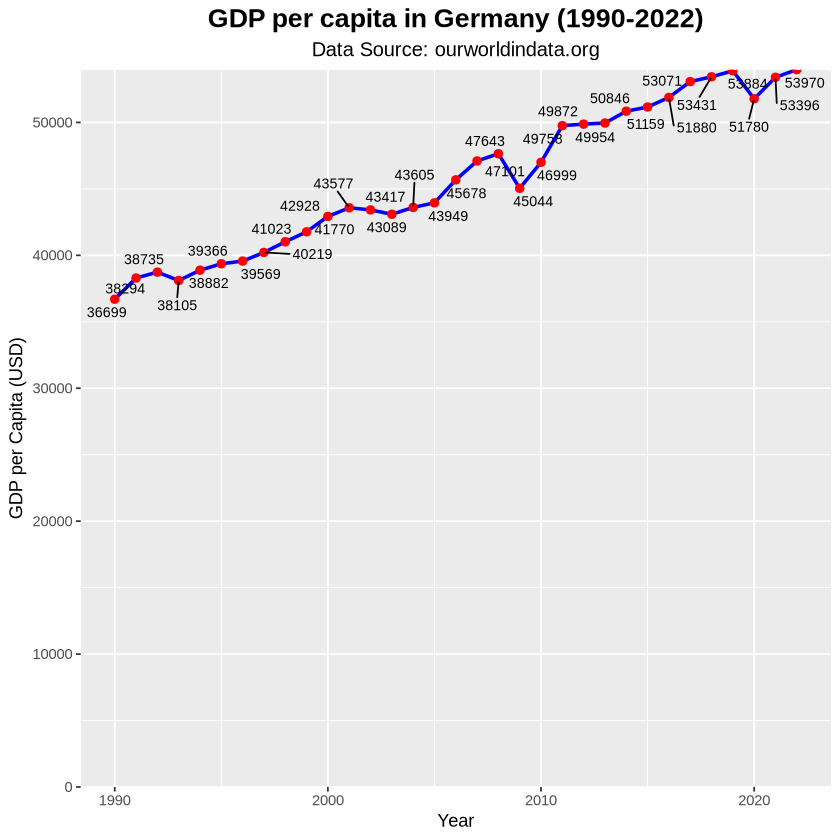

In [33]:
ggplot(DEGDP, aes(x = Year, y = GDPperCapita)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 2) +  # points per year
  geom_text_repel(aes(label = round(GDPperCapita, 0)),  # Labels
            size = 3, color = "black") +
    scale_y_continuous(expand = c(0, 0), limits = c(0, NA)) +
  labs(
    title = "GDP per capita in Germany (1990-2022)",
    subtitle = "Data Source: ourworldindata.org",
    x = "Year",
    y = "GDP per Capita (USD)"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    plot.subtitle = element_text(hjust = 0.5, size = 12)
  )

In [ ]:
# This is one way to visualize the GDP per capita data
# Lets do the same for the CEFR data

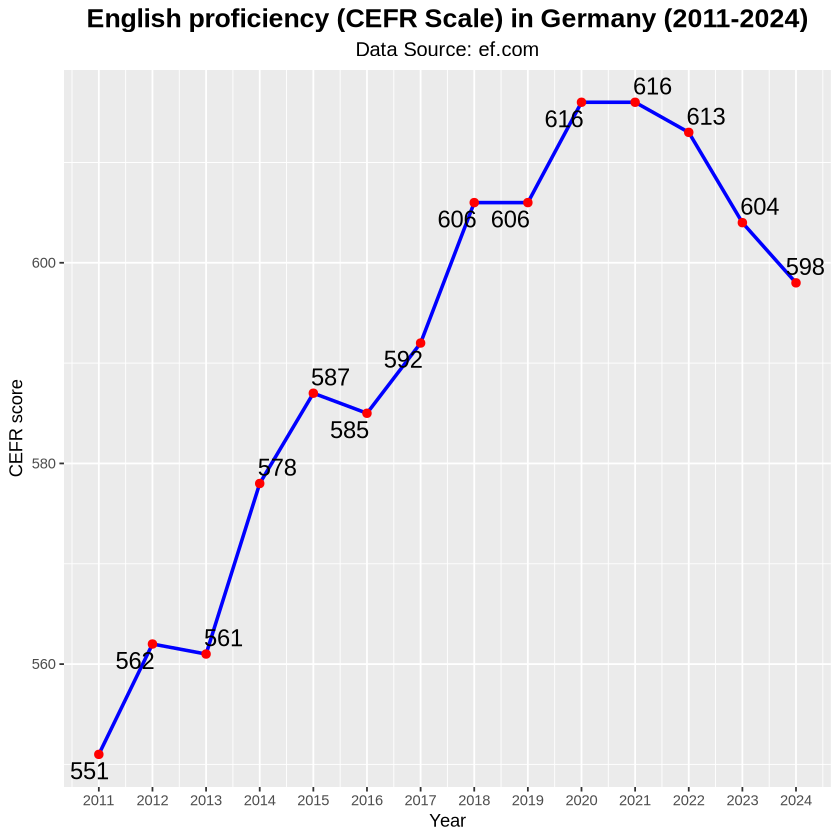

In [55]:
ggplot(DECEFR, aes(x = Year, y = Proficiency_CEFR)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 2) +  # points per year
  geom_text_repel(aes(label = Proficiency_CEFR),  # Labels
            size = 5, color = "black"
            ) +
    scale_x_continuous(
        breaks = seq(min(DECEFR$Year), max(DECEFR$Year), by = 1)
  ) +
  labs(
    title = "English proficiency (CEFR Scale) in Germany (2011-2024)",
    subtitle = "Data Source: ef.com",
    x = "Year",
    y = "CEFR score"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    plot.subtitle = element_text(hjust = 0.5, size = 12)
  )

In [ ]:
# Now let's figure out how to compare the two
# One way is by creating a dataset combining the two data sets from above, by merging them
# This is possible because the datasets share the "Year" value

In [56]:
DE_GDPandCEFR <- merge(DEGDP, DECEFR, by = "Year")

In [57]:
DE_GDPandCEFR

Year,Country,GDPperCapita,Proficiency_CEFR
<int>,<chr>,<dbl>,<int>
2011,Germany,49757.93,551
2012,Germany,49872.45,562
2013,Germany,49954.17,561
2014,Germany,50845.53,578
2015,Germany,51159.30,587
2016,Germany,51879.67,585
2017,Germany,53071.46,592
2018,Germany,53431.39,606
2019,Germany,53884.38,606


In [66]:
DE_GDPandCEFR$Proficiency_scaled <- DE_GDPandCEFR$Proficiency_CEFR * max(DE_GDPandCEFR$GDPperCapita) / max(DE_GDPandCEFR$Proficiency_CEFR)


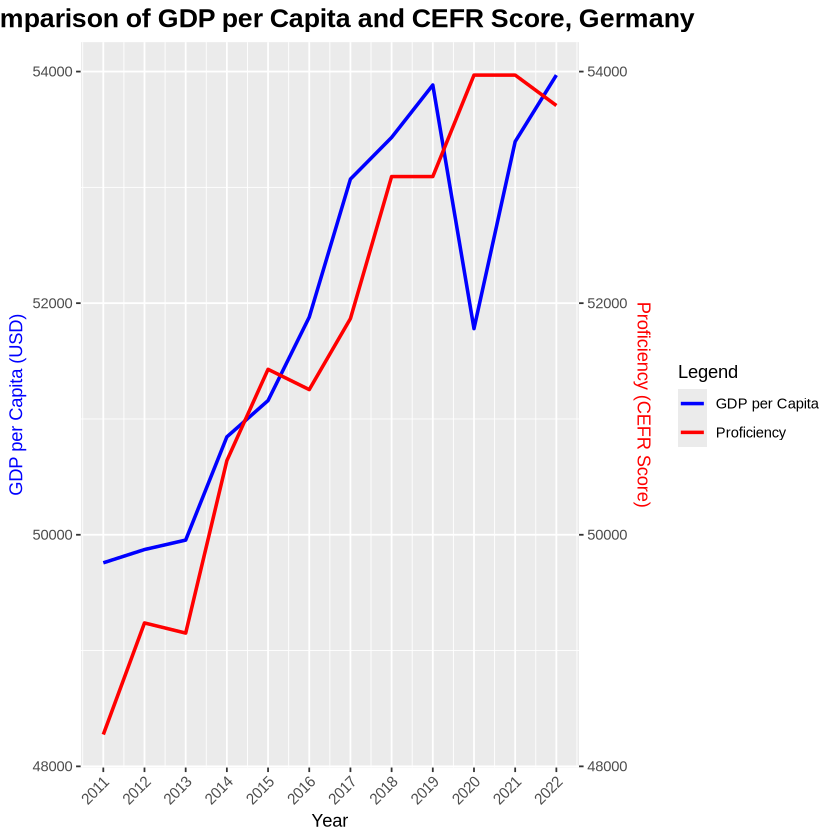

In [70]:
library(ggplot2)

ggplot(DE_GDPandCEFR, aes(x = Year)) +
  # GDP per capita:
  geom_line(aes(y = GDPperCapita, color = "GDP per Capita"), size = 1) +
  # CEFR:
  geom_line(aes(y = Proficiency_scaled, color = "Proficiency"), size = 1) +
  # Y-axis settings
  scale_y_continuous(
    name = "GDP per Capita (USD)",
    sec.axis = sec_axis(~ ., name = "Proficiency (CEFR Score)")
  ) +
  # Colors for lines
  scale_color_manual(
    values = c("GDP per Capita" = "blue", "Proficiency" = "red")
  ) +
  # Detailed X-axis
  scale_x_continuous(
    breaks = seq(min(DE_GDPandCEFR$Year), max(DE_GDPandCEFR$Year), by = 1)  # Ticks for every year
  ) +
  # Labels and Theme
  labs(
    title = "Comparison of GDP per Capita and CEFR Score, Germany",
    x = "Year",
    color = "Legend"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    axis.title.y = element_text(color = "blue"),
    axis.title.y.right = element_text(color = "red"),
    axis.text.x = element_text(angle = 45, hjust = 1)  # Rotate X-axis labels
  )
